In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ======================================================================
# IMPORTING DATASETS
# ======================================================================
print("="*70)
print("IMPORTING DATASETS")
print("="*70)

IMPORTING DATASETS


In [ ]:
# co2-emission-by-countries-year-wise


# Download latest version
path = kagglehub.dataset_download("moazzimalibhatti/co2-emission-by-countries-year-wise-17502022")

# print("Path to dataset files:", path)

primary_data_path = os.path.join(path,"CO2 emission by countries.csv")
primary_c02_emission_df =pd.read_csv(primary_data_path, encoding="latin1")

100%|██████████| 280k/280k [00:00<00:00, 56.4MB/s]

Extracting files...


In [ ]:
# Loading the data set land-area-km
area_df = pd.read_csv(
    "/content/drive/MyDrive/finalPortfolioDatasets./land-area-km.csv",
    encoding="latin1"
)

In [ ]:
# loading datasete global-co-and-greenhouse-gas-emissions for population

# Download latest version
path = kagglehub.dataset_download("ibrahimqasimi/global-co-and-greenhouse-gas-emissions-17502024")

# print("Path to dataset files:", path)
population_data_path = os.path.join(path,"owid_co2_data.csv")
population_df =pd.read_csv(population_data_path, encoding="latin1")

100%|██████████| 4.14M/4.14M [00:00<00:00, 123MB/s]

Extracting files...


In [ ]:
# loadinf dataset annual-co2-emissions for co2 emission for the year 2021 and 2022

# Download latest version
path = kagglehub.dataset_download("owentamunogilbert/annual-co2-emissions")

# print("Path to dataset files:", path)
last_years_data_path = os.path.join(path,"annual-co-emissions-by-region.csv")
last_years_emission_df =pd.read_csv(last_years_data_path, encoding="latin1")

100%|██████████| 192k/192k [00:00<00:00, 44.6MB/s]

Extracting files...


In [ ]:
# ======================================================================
# IMPORTING DATASETS
# ======================================================================
print("="*70)
print("EXPLORING FEATURES NEEDED TO CONCAT WITH PRIMARY DATAS.")
print("="*70)

EXPLORING FEATURES NEEDED TO CONCAT WITH PRIMARY DATAS.


In [ ]:
# GET COUNTRIES IN PRIMARY COUNTRIES
primary_countries = primary_c02_emission_df["Country"].unique()
# print(primary_countries)
# len(primary_c02_emission_df["Country"].unique())

In [ ]:
# GETTING COUNTRIES IN AREA_DF
countries_inArea_df = area_df['Entity'].unique()
# print(countries_inArea_df)
# len(area_df['Entity'].unique())

In [ ]:
# GETIING COUNTRIES IN DF USED FOR DATA OF 2021 AND 2022
latest_df_emission_countires= last_years_emission_df['Entity'].unique()
# print(latest_df_emission_countires)
# len(last_years_emission_df['Entity'].unique())

In [ ]:
# GETTING COUNTRIES FROM DFTO BE USED FOR EXTRACTION POPULATION
population_df_countries = population_df['country'].unique()
# print(population_df_countries)
# len(population_df['country'].unique())

In [ ]:
# ASSIGNING THE DF TO HAVE ONLY COUNTRIES FROM PRIMARY DF
last_years_emission_df = last_years_emission_df[last_years_emission_df['Entity'].isin(primary_countries)]
latest_df_emission_countires = last_years_emission_df['Entity'].unique()

population_df = population_df[population_df['country'].isin(primary_countries)]
population_df_countries = population_df['country'].unique()

area_df = area_df[area_df['Entity'].isin(primary_countries)]
countries_inArea_df = area_df['Entity'].unique()

In [ ]:
# Arrays of country names
# primary_countries, population_df_countries, countries_inArea_df, latest_df_emission_countires

datasets = {
    "population_df_countries": population_df_countries,
    "countries_inArea_df": countries_inArea_df,
    "latest_df_emission_countires": latest_df_emission_countires
}

# Check missing countries in each dataset
drop_countries = []
for name, arr in datasets.items():
    missing = set(primary_countries) - set(arr)
    if missing:
        print(f"\nIn {name}, these primary_countries are missing:")
        print(missing)
        for country in missing:
          drop_countries.append(country)
    else:
        print(f"All primary_countries exist in {name}")




In population_df_countries, these primary_countries are missing:
{'Mayotte', 'Timor', 'Guadeloupe', 'Micronesia', 'Martinique', 'Faeroe Islands', 'Puerto Rico', 'French Guiana', 'Reunion'}

In countries_inArea_df, these primary_countries are missing:
{'Montserrat', 'Wallis and Futuna', 'Kosovo', 'Mayotte', 'Cook Islands', 'Saint Helena', 'Saint Pierre and Miquelon', 'Anguilla', 'Taiwan', 'Timor', 'Guadeloupe', 'Micronesia', 'Martinique', 'Niue', 'Christmas Island', 'French Guiana', 'Faeroe Islands', 'Antarctica', 'Reunion'}

In latest_df_emission_countires, these primary_countries are missing:
{'Mayotte', 'Timor', 'Guadeloupe', 'Micronesia', 'Martinique', 'Faeroe Islands', 'Puerto Rico', 'French Guiana', 'Reunion'}


In [ ]:
# REMOVING COUNTRIES THATA RENT IN OTHER DATASETS
primary_c02_emission_df = primary_c02_emission_df[~primary_c02_emission_df['Country'].isin(drop_countries)]

In [ ]:
population_df_countries = population_df['country'].unique()
countries_inArea_df = area_df['Entity'].unique()
latest_df_emission_countires= last_years_emission_df['Entity'].unique()
primary_countries = primary_c02_emission_df['Country'].unique()

In [ ]:
# Arrays of country names
# primary_countries, population_df_countries, countries_inArea_df, latest_df_emission_countires

datasets = {
    "population_df_countries": population_df_countries,
    "countries_inArea_df": countries_inArea_df,
    "latest_df_emission_countires": latest_df_emission_countires
}

# Check missing countries in each dataset
drop_countries = []
for name, arr in datasets.items():
    missing =  set(arr) -set(primary_countries)
    if missing:
        print(f"\nIn {name}, these primary_countries are missing:")
        print(missing)
        for country in missing:
          drop_countries.append(country)
    else:
        print(f"All primary_countries exist in {name}")




In population_df_countries, these primary_countries are missing:
{'Montserrat', 'Anguilla', 'Cook Islands', 'Taiwan', 'Niue', 'Christmas Island', 'Saint Helena', 'Antarctica', 'Wallis and Futuna', 'Kosovo', 'Saint Pierre and Miquelon'}

In countries_inArea_df, these primary_countries are missing:
{'Puerto Rico'}

In latest_df_emission_countires, these primary_countries are missing:
{'Montserrat', 'Anguilla', 'Cook Islands', 'Taiwan', 'Niue', 'Christmas Island', 'Saint Helena', 'Antarctica', 'Wallis and Futuna', 'Kosovo', 'Saint Pierre and Miquelon'}


In [ ]:
last_years_emission_df = last_years_emission_df[last_years_emission_df['Entity'].isin(primary_countries)]
latest_df_emission_countires = last_years_emission_df['Entity'].unique()
population_df = population_df[population_df['country'].isin(primary_countries)]
population_df_countries = population_df['country'].unique()
area_df = area_df[area_df['Entity'].isin(primary_countries)]
countries_inArea_df = area_df['Entity'].unique()

In [ ]:
# MAKING SURE NO COUNTRY IS MISSING FROM ANY DATASETS
# Arrays of country names
# primary_countries, population_df_countries, countries_inArea_df, latest_df_emission_countires

datasets = {
    "population_df_countries": population_df_countries,
    "countries_inArea_df": countries_inArea_df,
    "latest_df_emission_countires": latest_df_emission_countires
}

# Check missing countries in each dataset
drop_countries = []
for name, arr in datasets.items():
    missing =  set(primary_countries)-set(arr)
    if missing:
        print(f"\nIn {name}, these primary_countries are missing:")
        print(missing)
        for country in missing:
          drop_countries.append(country)
    else:
        print(f"All primary_countries exist in {name}")



All primary_countries exist in population_df_countries
All primary_countries exist in countries_inArea_df
All primary_countries exist in latest_df_emission_countires


In [ ]:
# Filter for 2021 and 2022
last_years_df = last_years_emission_df.loc[
    last_years_emission_df['Year'].isin([2021, 2022]),
    ['Entity','Code', 'Year', 'Annual COâ\x82\x82 emissions']
].copy()
last_years_df['Year'].unique()

array([2021, 2022])

In [ ]:
# getting datas for the year 2021 and 2022

for i, row in last_years_df.iterrows():
    new_row = pd.DataFrame([{
        'Country': row['Entity'],
        'Code': row['Code'],
        'Year': row['Year'],
        'CO2 emission (Tons)': row['Annual COâ\x82\x82 emissions']
    }])
    primary_c02_emission_df = pd.concat([primary_c02_emission_df, new_row], ignore_index=True)


In [ ]:
# getting correct Population

population_df = population_df[['country','year', 'population']].copy()
for i, row in population_df.iterrows():
  primary_c02_emission_df.loc[(primary_c02_emission_df['Country'] == row['country']) & (primary_c02_emission_df['Year'] == row['year']),'Population(2022)'] = row['population']



In [ ]:
# getting correct Area

area_df = area_df[['Entity','Year', 'Land area (sq. km)']].copy()
for i, row in area_df.iterrows():
  primary_c02_emission_df.loc[(primary_c02_emission_df['Country'] == row['Entity']) & (primary_c02_emission_df['Year'] == row['Year']),'Area'] = row['Land area (sq. km)']


In [ ]:
# getting correct % of world landmass
WORLD_LAND_AREA = 148_940_000  # sq. km
primary_c02_emission_df['% of World'] = (
    primary_c02_emission_df['Area'] / WORLD_LAND_AREA
) * 100
primary_c02_emission_df['% of World'] = (
    primary_c02_emission_df['% of World'].round(2)
)


In [ ]:
# getting correct Density
primary_c02_emission_df['Density(km2)'] = (
    primary_c02_emission_df['Population(2022)'] / primary_c02_emission_df['Area']
)
primary_c02_emission_df['Density(km2)'] = (
    primary_c02_emission_df['Density(km2)'].round(2)
)


In [ ]:
# CHECKING FOR MISSING VALUES
primary_c02_emission_df.isna().sum()

,0
Country,0
Code,1355
Calling Code,2568
Year,0
CO2 emission (Tons),0
Population(2022),3828
Area,2245
% of World,2245
Density(km2),5293


In [ ]:
# sORTIGN VALUES IN TERMS OF COUNTRY NAME AND YEAR
primary_c02_emission_df = primary_c02_emission_df.sort_values(
    ['Country', 'Year']
)


In [ ]:
# hANDELING MISSING VALUES
primary_c02_emission_df.isna().sum()


,0
Country,0
Code,1355
Calling Code,2568
Year,0
CO2 emission (Tons),0
Population(2022),3828
Area,2245
% of World,2245
Density(km2),5293


In [ ]:
# HANDELING MISSING VALUES
primary_c02_emission_df['Population(2022)'] = (
    primary_c02_emission_df
    .groupby('Country')['Population(2022)']
    .transform(lambda x: x.ffill().bfill())
)
primary_c02_emission_df['Area'] = (
    primary_c02_emission_df
    .groupby('Country')['Area']
    .transform(lambda x: x.ffill().bfill())
)
primary_c02_emission_df['Code'] = (
    primary_c02_emission_df
    .groupby('Country')['Code']
    .transform(lambda x: x.ffill().bfill())
)
primary_c02_emission_df['% of World'] = (
    primary_c02_emission_df
    .groupby('Country')['% of World']
    .transform(lambda x: x.ffill().bfill())
)
primary_c02_emission_df['Density(km2)'] = (
    primary_c02_emission_df
    .groupby('Country')['Density(km2)']
    .transform(lambda x: x.ffill().bfill())
)



In [ ]:
primary_c02_emission_df.loc[primary_c02_emission_df["Country"] == "China",["Year","CO2 emission (Tons)"]]

,Year,CO2 emission (Tons)
10027,1750,0.000000e+00
10028,1751,0.000000e+00
10029,1752,0.000000e+00
10030,1753,0.000000e+00
10031,1754,0.000000e+00
...,...,...
10295,2018,2.140000e+11
10296,2019,2.250000e+11
10297,2020,2.360000e+11
54274,2021,1.133623e+10


Upon observation, the difference in the Co2 emisison for the eyar 2021 and 2022 is very controversial comapred tot hat of around 2020 and 2021 so we will be removing all the datas periviously included for 2021 and 2022.

In [ ]:
primary_c02_emission_df = primary_c02_emission_df[~primary_c02_emission_df["Year"].isin([2021, 2022])]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2


In [ ]:
primary_c02_emission_df.loc[primary_c02_emission_df["Country"] == "China",["Year","CO2 emission (Tons)"]]

,Year,CO2 emission (Tons)
10027,1750,0.000000e+00
10028,1751,0.000000e+00
10029,1752,0.000000e+00
10030,1753,0.000000e+00
10031,1754,0.000000e+00
...,...,...
10293,2016,1.940000e+11
10294,2017,2.040000e+11
10295,2018,2.140000e+11
10296,2019,2.250000e+11


In [ ]:


# Create CO2 per capita column
# Fix CO2 units: if values are in 'thousand tons'
primary_c02_emission_df["CO2_per_capita"] = (
    primary_c02_emission_df["CO2 emission (Tons)"] / 1000  # convert to tons
    / primary_c02_emission_df["Population(2022)"]
)

# Replace infinite values (division by zero) with NaN
primary_c02_emission_df["CO2_per_capita"].replace([np.inf, -np.inf], np.nan, inplace=True)


/tmp/ipython-input-2699359637.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  primary_c02_emission_df["CO2_per_capita"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
threshold = 3
primary_c02_emission_df["Emission_Class"] = primary_c02_emission_df["CO2_per_capita"].apply(
    lambda x: 1 if x > threshold else 0
)


In [ ]:
# ======================================================================
# ALL THE CLEANING AND MISSING DATAS HAVE BEEN DEALT WITH
# ======================================================================

print("="*70)
print('ALL THE CLEANING AND MISSING DATAS HAVE BEEN DEALT WITH')
print("="*70)

primary_c02_emission_df.to_csv("Cleaned_dataset_for_classification_task.csv", index=False)


ALL THE CLEANING AND MISSING DATAS HAVE BEEN DEALT WITH


In [ ]:
primary_c02_emission_df['CO2_per_capita'].describe()

,CO2_per_capita
count,54200.000000
mean,0.046263
std,0.210907
min,0.000000
25%,0.000000
50%,0.000000
75%,0.005409
max,6.794366


In [ ]:
mean  = primary_c02_emission_df['CO2_per_capita'].mean()
print("avg co2 per capital is :", mean)

median  = primary_c02_emission_df['CO2_per_capita'].median()
print("median co2 per capital is :", median)

std  = primary_c02_emission_df['CO2_per_capita'].std()
print("std co2 per capital is :", std)

avg co2 per capital is : 0.04626295047890525
median co2 per capital is : 0.0
std co2 per capital is : 0.21090729767970146


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

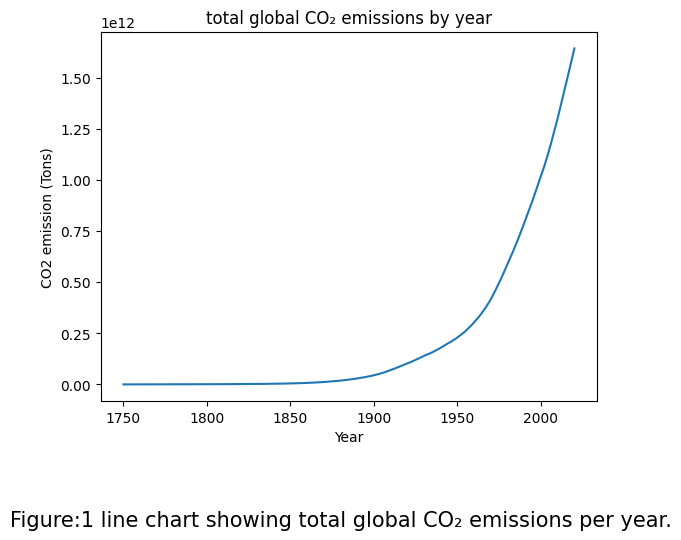

In [ ]:
# trend of co2 emission by year
df_year = primary_c02_emission_df.groupby("Year")["CO2 emission (Tons)"].sum().reset_index()
sns.lineplot(x="Year", y="CO2 emission (Tons)", data=df_year)
# Label x-axis
plt.xlabel("Year")

# Label y-axis
plt.ylabel("CO2 emission (Tons)")

plt.title("total global CO₂ emissions by year")

# Add figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:1 line chart showing total global CO₂ emissions per year.",
    ha="center",
    fontsize=15
)

# downlaoding the plot to use in report
plt.savefig("LineChar_totalCo2_overTime.png")
# plt.tight_layout()
plt.show()


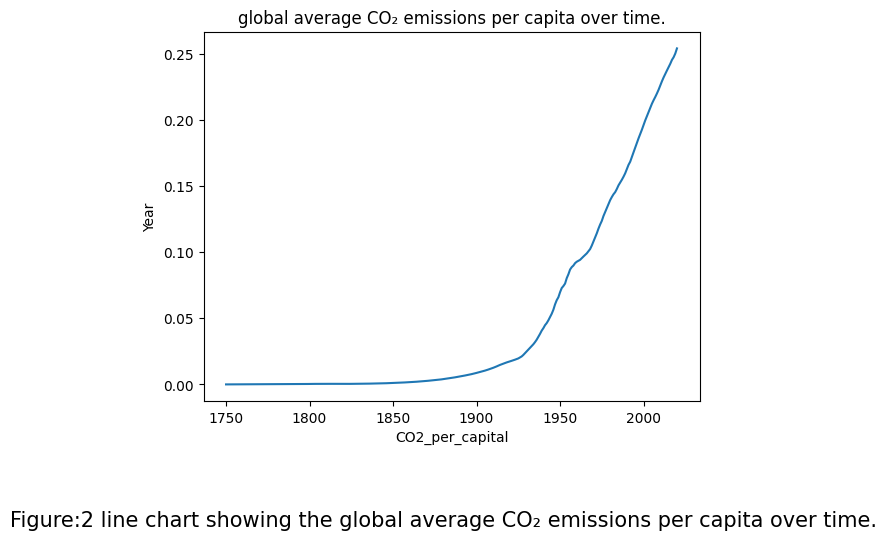

In [ ]:
df_year_pc = primary_c02_emission_df.groupby("Year")["CO2_per_capita"].mean().reset_index()
sns.lineplot(x="Year", y="CO2_per_capita", data=df_year_pc)

# Label x-axis
plt.xlabel("CO2_per_capital")

# Label y-axis
plt.ylabel("Year")

plt.title("global average CO₂ emissions per capita over time.")
# Add figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:2 line chart showing the global average CO₂ emissions per capita over time.",
    ha="center",
    fontsize=15,

)
# plt.figure()
# downlaoding the plot to use in report
plt.savefig("LineChar_avgCo2_overTime.png")
# plt.tight_layout()
plt.show()


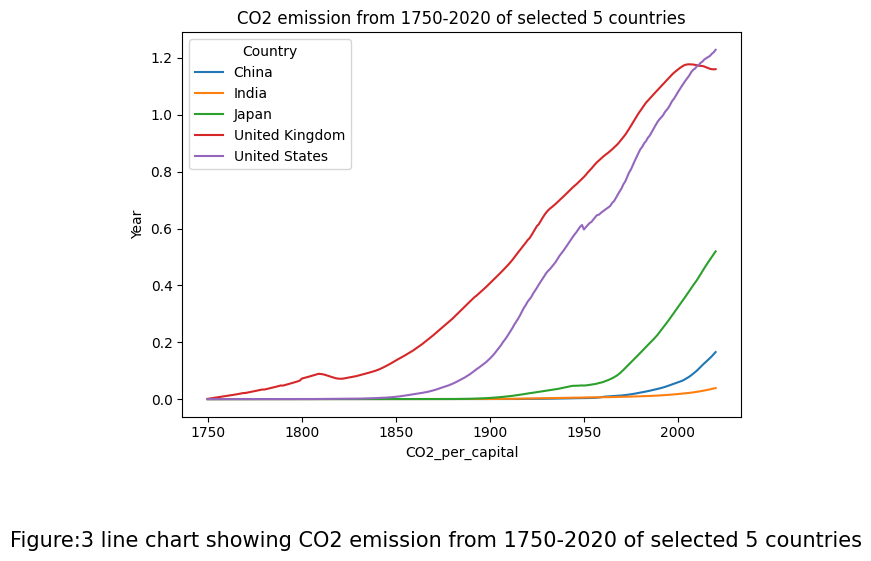

In [ ]:
top_countries = ["China","United States","India","United Kingdom","Japan"]
df_top = primary_c02_emission_df[primary_c02_emission_df["Country"].isin(top_countries)]
 # Create linechart with Seaborn
sns.lineplot(x="Year", y="CO2_per_capita", hue="Country", data=df_top)

# Label x-axis
plt.xlabel("CO2_per_capital")

# Label y-axis
plt.ylabel("Year")

plt.title("CO2 emission from 1750-2020 of selected 5 countries")
# Add figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:3 line chart showing CO2 emission from 1750-2020 of selected 5 countries",
    ha="center",
    fontsize=15
)

# downlaoding the plot to use in report
plt.savefig("BarGraph_5_selected_Country.png")
plt.tight_layout()
plt.show()



In [ ]:
primary_c02_emission_df.loc[(primary_c02_emission_df["Year"] == 2020) & (primary_c02_emission_df["Country"] == "China")]

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),CO2_per_capita,Emission_Class
10297,China,CN,86,2020,2.360000e+11,1.426106e+09,9388210.0,6.3,151.9,0.165486,0


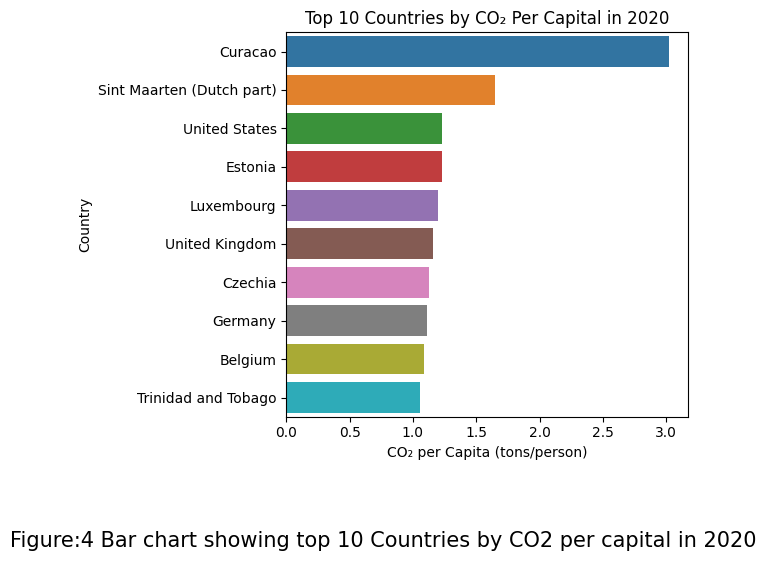

In [ ]:
# top 10 co2 emission countries in 2020
df_2020 = primary_c02_emission_df[primary_c02_emission_df["Year"] == 2020]
df_2020_sorted = df_2020.sort_values("CO2_per_capita", ascending=False).head(10)

# Create bar chart with Seaborn
sns.barplot(x="CO2_per_capita", y="Country", data=df_2020_sorted, hue="Country")

plt.title("Top 10 Countries by CO₂ Per Capital in 2020")
# Label for the x-axis
plt.xlabel("CO₂ per Capita (tons/person)")
# Label y-axis
plt.ylabel("Country")

# Add figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:4 Bar chart showing top 10 Countries by CO2 per capital in 2020",
    ha="center",
    fontsize=15
)
# plt.figure(figsize=(10, 6))

# downlaoding the plot to use in report
plt.savefig("BarGraph_top10_Country.png", bbox_inches="tight", dpi=300)
plt.tight_layout()
plt.show()

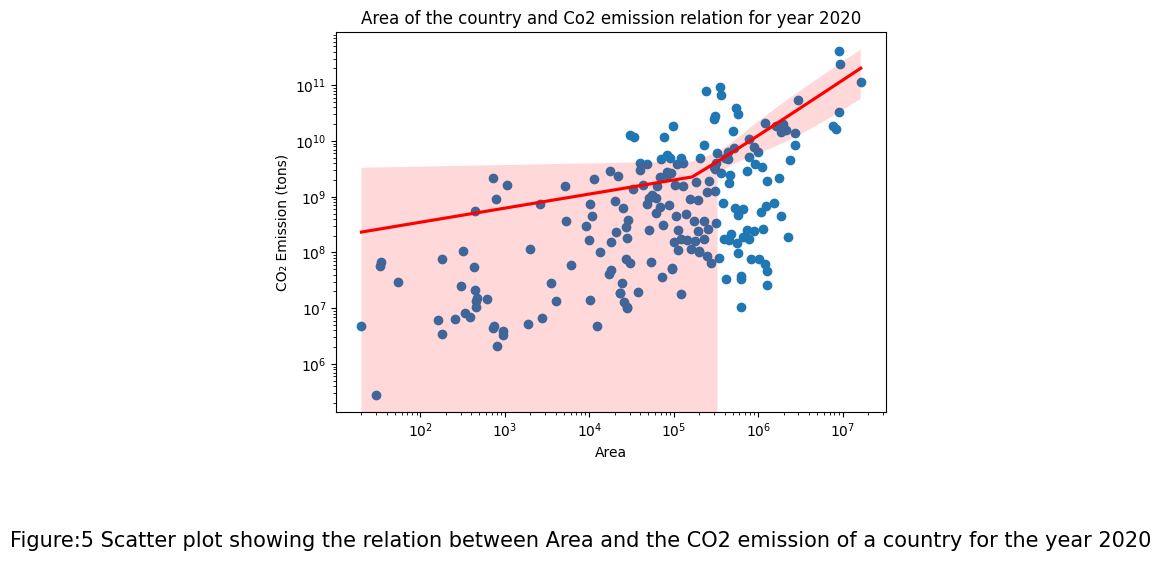

In [ ]:
data_lats_year = primary_c02_emission_df.loc[primary_c02_emission_df['Year'] == 2020]
sns.regplot(x="Area", y="CO2 emission (Tons)", data=data_lats_year,        scatter_kws={'alpha': 1}, #setting the transparecy of the points to fully opaque
        line_kws={'color': 'red'}) #setting the reg line color to red
# values scaled to relative differences become visible
plt.xscale('log')
plt.yscale('log')
# title of the plot
plt.title("Area of the country and Co2 emission relation for year 2020")

# label for x-axis
plt.xlabel("Area")
# label for y-axis
plt.ylabel("CO₂ Emission (tons)")

# Add figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:5 Scatter plot showing the relation between Area and the CO2 emission of a country for the year 2020",
    ha="center",
    fontsize=15
)

# downlaoding the plot to use in report
plt.savefig("ScatterPlot_Area_Co2emission_2020.png")

plt.tight_layout()
plt.show()

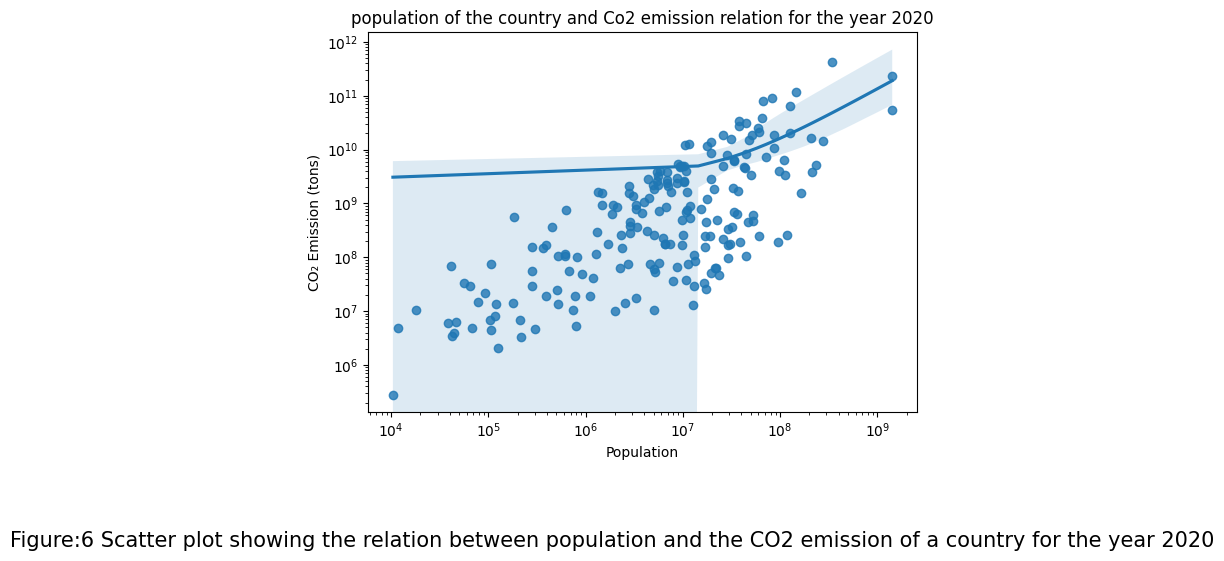

In [ ]:
data_lats_year = primary_c02_emission_df.loc[primary_c02_emission_df['Year'] == 2020]
sns.regplot(x="Population(2022)", y="CO2 emission (Tons)", data=data_lats_year)

# scaled to iradicate the scale difference among the larger and smaller countries
plt.xscale('log')
plt.yscale('log')

# title for the plot
plt.title("population of the country and Co2 emission relation for the year 2020")

# label for x-aaxis
plt.xlabel("Population")
# label for y-axis
plt.ylabel("CO₂ Emission (tons)")


# Add figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:6 Scatter plot showing the relation between population and the CO2 emission of a country for the year 2020",
    ha="center",
    fontsize=15
)

# downlaoding the plot to use in report
plt.savefig("ScatterPlot_population_Co2emission_2020.png")


plt.tight_layout()
plt.show()

A wrapper-based feature selection approach using Recursive Feature Elimination (RFE) with Logistic Regression was applied. Seven numerical features were initially considered. The top five most relevant features were selected based on model coefficients. The model trained using the selected features achieved simmilar yet highly acccurate results. this outcome is due to small number of features. hence we can use all th e7 out of 7 features to built our models.

In [ ]:
primary_c02_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 0 to 54199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              54200 non-null  object 
 1   Code                 54200 non-null  object 
 2   Calling Code         52032 non-null  object 
 3   Year                 54200 non-null  int64  
 4   CO2 emission (Tons)  54200 non-null  float64
 5   Population(2022)     54200 non-null  float64
 6   Area                 54200 non-null  float64
 7   % of World           54200 non-null  float64
 8   Density(km2)         54200 non-null  float64
 9   CO2_per_capita       54200 non-null  float64
 10  Emission_Class       54200 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 5.0+ MB


In [ ]:
df_2020 =primary_c02_emission_df.loc[primary_c02_emission_df["Year"] == 2020]

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 270 to 54199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              200 non-null    object 
 1   Code                 200 non-null    object 
 2   Calling Code         192 non-null    object 
 3   Year                 200 non-null    int64  
 4   CO2 emission (Tons)  200 non-null    float64
 5   Population(2022)     200 non-null    float64
 6   Area                 200 non-null    float64
 7   % of World           200 non-null    float64
 8   Density(km2)         200 non-null    float64
 9   CO2_per_capita       200 non-null    float64
 10  Emission_Class       200 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 18.8+ KB


In [ ]:
Q1_co2 = df_2020["CO2 emission (Tons)"].quantile(0.25)
Q3_co2 = df_2020["CO2 emission (Tons)"].quantile(0.75)
IQR_co2 = Q3_co2 - Q1_co2

# calculating lower bound outliers for 2020 w.r.t co2
co2_lower = Q1_co2 - 1.5 * IQR_co2
# calculating upper bound outliers for 2020 w.r.t co2
co2_upper = Q3_co2 + 1.5 * IQR_co2


# determining outliers
df_2020["Outlier"] = (
    (df_2020["CO2 emission (Tons)"] < co2_lower) | (df_2020["CO2 emission (Tons)"] > co2_upper))

# filtering out data points in df_2020 that are outliers
outliers = df_2020[df_2020["Outlier"] == True]
# outliers[["country", "hdi", "gross_inc_percap"]].head()

# Separate normal points and outliers
normal_co2 = df_2020[df_2020["Outlier"] == False]
outlier_co2 = df_2020[df_2020["Outlier"] == True]


/tmp/ipython-input-1891154897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["Outlier"] = (


In [ ]:
outlier_co2[["Country","Year","Area","CO2 emission (Tons)"]].head()

,Country,Year,Area,CO2 emission (Tons)
1896,Argentina,2020,2736690.0,8.431213e+09
2709,Australia,2020,7692020.0,1.863575e+10
4877,Belgium,2020,30494.0,1.254314e+10
7045,Brazil,2020,8358140.0,1.623851e+10
8942,Canada,2020,8965590.0,3.357674e+10


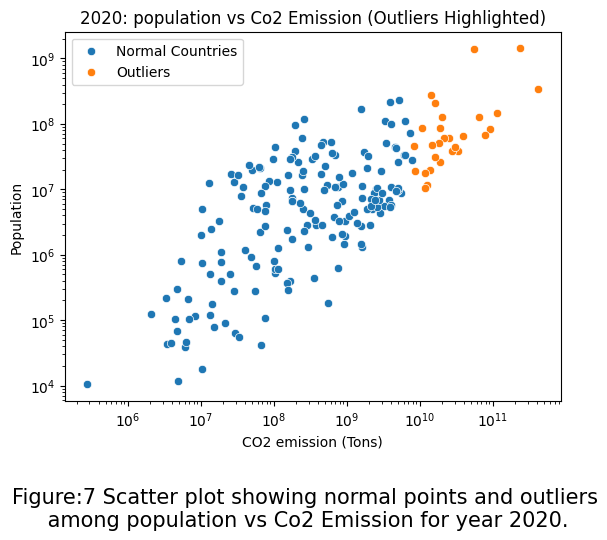

In [ ]:

# plot the scartter plot
sns.scatterplot(
    data=normal_co2, #for normal data points
    y="Population(2022)", # Area on x-axis
    x="CO2 emission (Tons)", # CO2 emission (Tons) on y_axis
    label="Normal Countries"
)


sns.scatterplot(
    data=outlier_co2, # for ouliter data points
    y="Population(2022)", #  population on x-axis
    x="CO2 emission (Tons)", # CO2 emission (Tons) on x-axis
    label="Outliers"
)
plt.xscale('log')
plt.yscale('log')
# label for x-axis
plt.ylabel("Population")

#label for y_axis
plt.xlabel("CO2 emission (Tons)")

# a discriptive title for the graph
plt.title("2020: population vs Co2 Emission (Outliers Highlighted)")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:7 Scatter plot showing normal points and outliers\n among population vs Co2 Emission for year 2020.",
    ha="center",
    fontsize=15
)

plt.savefig("Co2_outliers_for_2020.png")

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



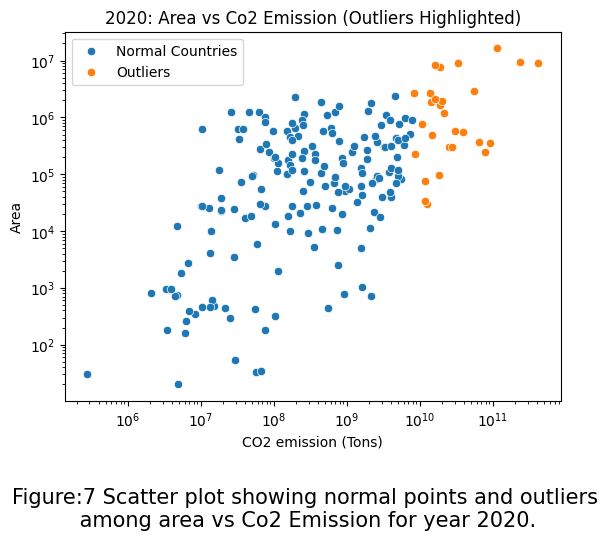

In [ ]:

# plot the scartter plot
sns.scatterplot(
    data=normal_co2, #for normal data points
    y="Area", # Area on x-axis
    x="CO2 emission (Tons)", # CO2 emission (Tons) on y_axis
    label="Normal Countries"
)


sns.scatterplot(
    data=outlier_co2, # for ouliter data points
    y="Area", #  Area on x-axis
    x="CO2 emission (Tons)", # CO2 emission (Tons) on x-axis
    label="Outliers"
)
plt.xscale('log')
plt.yscale('log')
# label for x-axis
plt.ylabel("Area")

#label for y_axis
plt.xlabel("CO2 emission (Tons)")

# a discriptive title for the graph
plt.title("2020: Area vs Co2 Emission (Outliers Highlighted)")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:7 Scatter plot showing normal points and outliers\n among area vs Co2 Emission for year 2020.",
    ha="center",
    fontsize=15
)

plt.savefig("Co2_outliers_for_2020_area.png")

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



In [ ]:
primary_c02_emission_df = primary_c02_emission_df.drop(outlier_co2.index)


In [ ]:
outlier_co2.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),CO2_per_capita,Emission_Class,Outlier
1896,Argentina,AR,54,2020,8.431213e+09,45191960.0,2736690.0,1.84,16.51,0.186564,0,True
2709,Australia,AU,61,2020,1.863575e+10,25743787.0,7692020.0,5.16,3.35,0.723893,0,True
4877,Belgium,BE,32,2020,1.254314e+10,11540102.0,30494.0,0.02,378.44,1.086918,0,True
7045,Brazil,BR,55,2020,1.623851e+10,208660845.0,8358140.0,5.61,24.96,0.077822,0,True
8942,Canada,CA,1,2020,3.357674e+10,38171903.0,8965590.0,6.02,4.26,0.879619,0,True


In [ ]:
primary_c02_emission_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54172 entries, 0 to 54199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              54172 non-null  object 
 1   Code                 54172 non-null  object 
 2   Calling Code         52005 non-null  object 
 3   Year                 54172 non-null  int64  
 4   CO2 emission (Tons)  54172 non-null  float64
 5   Population(2022)     54172 non-null  float64
 6   Area                 54172 non-null  float64
 7   % of World           54172 non-null  float64
 8   Density(km2)         54172 non-null  float64
 9   CO2_per_capita       54172 non-null  float64
 10  Emission_Class       54172 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 5.0+ MB


In [ ]:
Q1_co2 = primary_c02_emission_df["CO2 emission (Tons)"].quantile(0.25)
Q3_co2 = primary_c02_emission_df["CO2 emission (Tons)"].quantile(0.75)
IQR_co2 = Q3_co2 - Q1_co2

# calculating lower bound outliers for 2020 w.r.t co2
co2_lower = Q1_co2 - 1.5 * IQR_co2
# calculating upper bound outliers for 2020 w.r.t co2
co2_upper = Q3_co2 + 1.5 * IQR_co2


# determining outliers
primary_c02_emission_df["Outlier"] = (
    (primary_c02_emission_df["CO2 emission (Tons)"] < co2_lower) | (primary_c02_emission_df["CO2 emission (Tons)"] > co2_upper))

# filtering out data points in primary_c02_emission_df that are outliers
outliers = primary_c02_emission_df[primary_c02_emission_df["Outlier"] == True]
# outliers[["country", "hdi", "gross_inc_percap"]].head()

# Separate normal points and outliers
normal_co2 = primary_c02_emission_df[primary_c02_emission_df["Outlier"] == False]
outlier_co2 = primary_c02_emission_df[primary_c02_emission_df["Outlier"] == True]


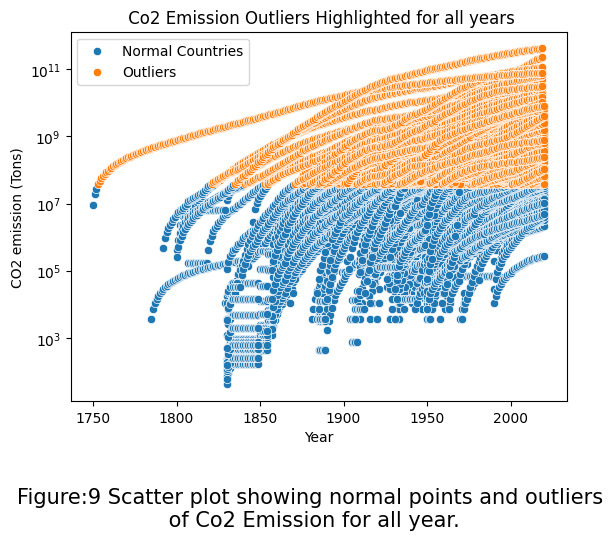

In [ ]:

# plot the scartter plot
sns.scatterplot(
    data=normal_co2, #for normal data points
    x="Year", # Area on x-axis
    y="CO2 emission (Tons)", # CO2 emission (Tons) on y_axis
    label="Normal Countries"
)


sns.scatterplot(
    data=outlier_co2, # for ouliter data points
    x="Year", #  Area on x-axis
    y="CO2 emission (Tons)", # CO2 emission (Tons) on x-axis
    label="Outliers"
)

plt.yscale('log')
# label for x-axis
plt.xlabel("Year")

#label for y_axis
plt.ylabel("CO2 emission (Tons)")

# a discriptive title for the graph
plt.title(" Co2 Emission Outliers Highlighted for all years")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:9 Scatter plot showing normal points and outliers\n of Co2 Emission for all year.",
    ha="center",
    fontsize=15
)

plt.savefig("Co2_outliers_by_year.png")

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



In [ ]:
len(outlier_co2)

11554